In [1]:
# Initialize OK
from client.api.notebook import Notebook
ok = Notebook('proj1b.ok')

Assignment: proj1b
OK, version v1.13.11



# Project 1 Part B

## Due Date: Monday, Feb 24th, 11:59PM

## Collaboration Policy

Data science is a collaborative activity. While you may talk with others about
the homework, we ask that you **write your solutions individually**. If you do
discuss the assignments with others please **include their names** below.



**Collaborators**: *list  collaborators here*

## Scoring Breakdown

|Question|Points|
|---|---|
|1a|1|
|1b|2|
|1ci|3|
|1cii|1|
|2a|2|
|2b|1|
|2ci|4|
|2cii|2|
|2d|2|
|2e|1|
|2f|1|
|2g|3|
|3a|3|
|3b|4|
|3c|1|
|3d|2|
|4 |5|
|**Total**|38|


First we import the relevant libraries for this project.

In [2]:
import pickle
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
plt.style.use('fivethirtyeight')

In the following cell, we will load the cleaned data from Part A of Project 1. Note that we will be using the relevant data files based on the staff solution.

In [3]:
ins = pickle.load(open('./data/ins.p', 'rb'))
vio = pickle.load(open('./data/vio.p', 'rb'))
ins2vio = pickle.load(open('./data/ins2vio.p', 'rb'))
bus = pickle.load(open('./data/bus.p', 'rb'))

**Note**: For all parts of this project requiring you to produce a visualization, we won't be enforcing any specific size on the plots you make, as long as they are clear (i.e. no overlaps) and follow the specifications. 

In [4]:
ins

,iid,date,score,type,bid,timestamp,year,Missing Score
0,100010_20190329,03/29/2019 12:00:00 AM,-1,New Construction,100010,2019-03-29,2019,True
1,100010_20190403,04/03/2019 12:00:00 AM,100,Routine - Unscheduled,100010,2019-04-03,2019,False
2,100017_20190417,04/17/2019 12:00:00 AM,-1,New Ownership,100017,2019-04-17,2019,True
3,100017_20190816,08/16/2019 12:00:00 AM,91,Routine - Unscheduled,100017,2019-08-16,2019,False
4,100017_20190826,08/26/2019 12:00:00 AM,-1,Reinspection/Followup,100017,2019-08-26,2019,True
...,...,...,...,...,...,...,...,...
26658,999_20180924,09/24/2018 12:00:00 AM,-1,Routine - Scheduled,999,2018-09-24,2018,True
26659,999_20181102,11/02/2018 12:00:00 AM,-1,Reinspection/Followup,999,2018-11-02,2018,True
26660,999_20190909,09/09/2019 12:00:00 AM,80,Routine - Unscheduled,999,2019-09-09,2019,False
26661,99_20171207,12/07/2017 12:00:00 AM,82,Routine - Unscheduled,99,2017-12-07,2017,False


In [5]:
ins = ins[ins['score'] >= 0]

In [6]:
ins

,iid,date,score,type,bid,timestamp,year,Missing Score
1,100010_20190403,04/03/2019 12:00:00 AM,100,Routine - Unscheduled,100010,2019-04-03,2019,False
3,100017_20190816,08/16/2019 12:00:00 AM,91,Routine - Unscheduled,100017,2019-08-16,2019,False
15,100041_20190520,05/20/2019 12:00:00 AM,83,Routine - Unscheduled,100041,2019-05-20,2019,False
20,100055_20190425,04/25/2019 12:00:00 AM,98,Routine - Unscheduled,100055,2019-04-25,2019,False
21,100055_20190912,09/12/2019 12:00:00 AM,82,Routine - Unscheduled,100055,2019-09-12,2019,False
...,...,...,...,...,...,...,...,...
26654,999_20170714,07/14/2017 12:00:00 AM,77,Routine - Unscheduled,999,2017-07-14,2017,False
26656,999_20180123,01/23/2018 12:00:00 AM,80,Routine - Unscheduled,999,2018-01-23,2018,False
26660,999_20190909,09/09/2019 12:00:00 AM,80,Routine - Unscheduled,999,2019-09-09,2019,False
26661,99_20171207,12/07/2017 12:00:00 AM,82,Routine - Unscheduled,99,2017-12-07,2017,False


In [7]:
vio

,description,risk_category,vid
0,Consumer advisory not provided for raw or unde...,Moderate Risk,103128
1,Contaminated or adulterated food,High Risk,103108
2,Discharge from employee nose mouth or eye,Moderate Risk,103117
3,Employee eating or smoking,Moderate Risk,103118
4,Food in poor condition,Moderate Risk,103123
...,...,...,...
60,Unclean unmaintained or improperly constructed...,Low Risk,103152
61,Unpermitted food facility,Low Risk,103158
62,Unsanitary employee garments hair or nails,Low Risk,103136
63,Wiping cloths not clean or properly stored or ...,Low Risk,103149


In [8]:
ins2vio

,iid,vid
0,97975_20190725,103124
1,85986_20161011,103114
2,95754_20190327,103124
3,77005_20170429,103120
4,4794_20181030,103138
...,...,...
40205,76958_20180919,103119
40206,80305_20190411,103149
40207,80233_20190417,103133
40208,100216_20190321,103119


In [9]:
bus

,bid,name,address,city,state,postal_code,latitude,longitude,phone_number,postal5
0,1000,HEUNG YUEN RESTAURANT,3279 22nd St,San Francisco,CA,94110,37.755282,-122.420493,-9999,94110
1,100010,ILLY CAFFE SF_PIER 39,PIER 39 K-106-B,San Francisco,CA,94133,-9999.000000,-9999.000000,14154827284,94133
2,100017,AMICI'S EAST COAST PIZZERIA,475 06th St,San Francisco,CA,94103,-9999.000000,-9999.000000,14155279839,94103
3,100026,LOCAL CATERING,1566 CARROLL AVE,San Francisco,CA,94124,-9999.000000,-9999.000000,14155860315,94124
4,100030,OUI OUI! MACARON,2200 JERROLD AVE STE C,San Francisco,CA,94124,-9999.000000,-9999.000000,14159702675,94124
...,...,...,...,...,...,...,...,...,...,...
6248,99948,SUSIECAKES BAKERY,3509 CALIFORNIA ST,San Francisco,CA,94118,-9999.000000,-9999.000000,14150452253,94118
6249,99988,HINODEYA SOMA,303 02nd ST STE 102,San Francisco,CA,94107,-9999.000000,-9999.000000,-9999,94107
6250,99991,TON TON,422 GEARY ST,San Francisco,CA,94102,-9999.000000,-9999.000000,14155531280,94102
6251,99992,URBAN EXPRESS KITCHENS LLC,475 06th ST,San Francisco,CA,94103,-9999.000000,-9999.000000,14150368085,94103


In [10]:
filtered = ins[ins['score'] != -1]
filtered

,iid,date,score,type,bid,timestamp,year,Missing Score
1,100010_20190403,04/03/2019 12:00:00 AM,100,Routine - Unscheduled,100010,2019-04-03,2019,False
3,100017_20190816,08/16/2019 12:00:00 AM,91,Routine - Unscheduled,100017,2019-08-16,2019,False
15,100041_20190520,05/20/2019 12:00:00 AM,83,Routine - Unscheduled,100041,2019-05-20,2019,False
20,100055_20190425,04/25/2019 12:00:00 AM,98,Routine - Unscheduled,100055,2019-04-25,2019,False
21,100055_20190912,09/12/2019 12:00:00 AM,82,Routine - Unscheduled,100055,2019-09-12,2019,False
...,...,...,...,...,...,...,...,...
26654,999_20170714,07/14/2017 12:00:00 AM,77,Routine - Unscheduled,999,2017-07-14,2017,False
26656,999_20180123,01/23/2018 12:00:00 AM,80,Routine - Unscheduled,999,2018-01-23,2018,False
26660,999_20190909,09/09/2019 12:00:00 AM,80,Routine - Unscheduled,999,2019-09-09,2019,False
26661,99_20171207,12/07/2017 12:00:00 AM,82,Routine - Unscheduled,99,2017-12-07,2017,False


In [11]:
filtered['score'].value_counts()

100    1993
96     1681
92     1260
94     1250
90     1085
98     1080
88      659
86      516
87      513
85      453
89      395
83      367
81      286
93      277
84      276
91      268
82      240
80      197
79      178
78      149
77      128
75      120
76      111
74      101
72       77
73       69
71       63
70       48
68       29
69       28
65       25
67       24
66       16
64       15
63       11
62       10
60        7
59        5
61        5
58        4
57        4
55        3
51        1
45        1
46        1
54        1
48        1
Name: score, dtype: int64

In [12]:
ins['score']

1        100
3         91
15        83
20        98
21        82
        ... 
26654     77
26656     80
26660     80
26661     82
26662     84
Name: score, Length: 14031, dtype: int64

<br/><br/><br/><br/>

---

<br/><br/>

## 1: Explore Inspection Scores

In this first part we explore some of the basic inspection score values visually.

<br/><br/><br/>

---


### Question 1a
Let's look at the distribution of inspection scores. As we saw before when we called head on this data frame, inspection scores appear to be integer values. The discreteness of this variable means that we can use a barplot to visualize the distribution of the inspection score. Make a bar plot of the counts of the number of inspections receiving each score.

It should look like the image below. It does not need to look exactly the same (e.g., no grid), but make sure that all labels and axes are correct.

![](data/1a.png)

You might find this matplotlib.pyplot tutorial useful. Key syntax that you'll need:

```
plt.bar
plt.xlabel
plt.ylabel
plt.title
```

*Note*: If you want to use another plotting library for your plots (e.g. plotly, sns) you are welcome to use that library instead so long as it works on DataHub. If you use seaborn sns.countplot(), you may need to manually set what to display on xticks.


<!--
BEGIN QUESTION
name: q1a
points: 1
manual: True
-->
<!-- EXPORT TO PDF -->

Text(0.5, 1.0, 'Distribution of Inspection Scores')

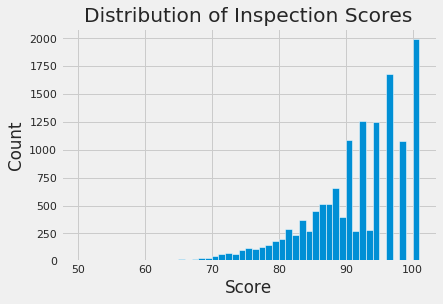

In [13]:
# # names = ['group_a', 'group_b', 'group_c']
# # values = [1, 10, 100]
# # plt.figure(figsize=(9, 3))
# # plt.bar(names, values)

# filtered = ins[ins['score'] != -1]
# names = [0, 50, 60, 70, 80, 90, 100]
# values = [250,500,750,1000,1250, 1500, 1750, 2000]

# plt.bar(names, height=values)

# plt.xlabel('Score')
# plt.ylabel('Count')
# plt.title('Distribution of Inspection Scores')



bw_bins = range(50, 102, 1)
plt = filtered['score'].hist(bins=bw_bins, ec='w')
plt.set_xlabel('Score')
plt.set_ylabel('Count')
plt.set_title('Distribution of Inspection Scores')




<br/><br/><br/>

---

### Question 1b
Describe the qualities of the distribution of the inspections scores based on your bar plot. Consider the mode(s), symmetry, tails, gaps, and anomalous values. Are there any unusual features of this distribution? What do your observations imply about the scores?

<!--
BEGIN QUESTION
name: q1b
points: 2
manual: True
-->
<!-- EXPORT TO PDF -->

Answer:
+ Modes: the great frequency of number score 100 (Peak) shows that there are more than 2000 restaurants that have perfect score. This is the highest/tallest amount of data we have in our graph.


+ Symmetry: (negatively) Skewed LEFT distribution. The bulk of the observations are medium/large, with a few observations that are much smaller than the rest. For example, the score of 90, 92, 94, 96, 98, 100 are greatly higher than all other scores; and as we can see, the scores below 85 are much smaller than the rest. It follows the Pareto principle (also known as 80/20 rule), which states that "roughly 80% of the effects come from 20 % of the causes".


+ Tails: the left tail (smaller values on the left) is much longer than the right tail (larger values on the right).


+ Gaps: As we can see, there are no values/data for the restaurant scores of 95, 97, 99. Even though there are no outliers in this graph, there exists gaps between some of the largest score we have in the data.


+ Anomalous values: as observed from the graph and the series below, there are no score of 95, 97, 99 in our data of restaurants.


+ Observations: there are 3 unusual features of this distribution. Firstly, we observe that there are no (or very little) restaurants that have score lower than 65. Secondly, there are 3 anomalous score values on the graph: 95, 97, and 99: there are no restaurants that have this scores. Lastly, the score of 91 and 93 are greatly lower than its adjacent scores, including 90, 92, 94, 96, 98, 100.


+ Implications: from observations, the restaurant food safety scores for restaurants in San Francisco has some restrictions for scores above 90 and below 65.

In [14]:
filtered['score'].value_counts()

100    1993
96     1681
92     1260
94     1250
90     1085
98     1080
88      659
86      516
87      513
85      453
89      395
83      367
81      286
93      277
84      276
91      268
82      240
80      197
79      178
78      149
77      128
75      120
76      111
74      101
72       77
73       69
71       63
70       48
68       29
69       28
65       25
67       24
66       16
64       15
63       11
62       10
60        7
59        5
61        5
58        4
57        4
55        3
51        1
45        1
46        1
54        1
48        1
Name: score, dtype: int64

<br/><br/><br/>

---

### Question 1c
Let's figure out which restaurants had the worst scores ever (single lowest score). Let's start by creating a new dataframe called `ins_named`. It should be exactly the same as ins, except that it should have the name and address of every business, as determined by the bus dataframe. If a `business_id` in ins does not exist in bus, the name and address should be given as `NaN`.

**Hint**: Use the merge method to join the ins dataframe with the appropriate portion of the bus dataframe. See the official documentation on how to use merge.

**Note**: For quick reference, a pandas left join keeps the keys from the left frame, so if ins is the left frame, all the keys from ins are kept and if a set of these keys don't have matches in the other frame, the columns from the other frame for these "unmatched" key rows contains NaNs.

<!--
BEGIN QUESTION
name: q1ci
points: 3
-->

In [15]:
ins_named = pd.merge(ins, bus.drop(columns=['city','state','postal_code', 'latitude',
            'longitude', 'phone_number','postal5']), how='left')
ins_named

,iid,date,score,type,bid,timestamp,year,Missing Score,name,address
0,100010_20190403,04/03/2019 12:00:00 AM,100,Routine - Unscheduled,100010,2019-04-03,2019,False,ILLY CAFFE SF_PIER 39,PIER 39 K-106-B
1,100017_20190816,08/16/2019 12:00:00 AM,91,Routine - Unscheduled,100017,2019-08-16,2019,False,AMICI'S EAST COAST PIZZERIA,475 06th St
2,100041_20190520,05/20/2019 12:00:00 AM,83,Routine - Unscheduled,100041,2019-05-20,2019,False,UNCLE LEE CAFE,3608 BALBOA ST
3,100055_20190425,04/25/2019 12:00:00 AM,98,Routine - Unscheduled,100055,2019-04-25,2019,False,Twirl and Dip,335 Martin Luther King Jr. Dr
4,100055_20190912,09/12/2019 12:00:00 AM,82,Routine - Unscheduled,100055,2019-09-12,2019,False,Twirl and Dip,335 Martin Luther King Jr. Dr
...,...,...,...,...,...,...,...,...,...,...
14026,999_20170714,07/14/2017 12:00:00 AM,77,Routine - Unscheduled,999,2017-07-14,2017,False,SERRANO'S PIZZA II,3274 21st St
14027,999_20180123,01/23/2018 12:00:00 AM,80,Routine - Unscheduled,999,2018-01-23,2018,False,SERRANO'S PIZZA II,3274 21st St
14028,999_20190909,09/09/2019 12:00:00 AM,80,Routine - Unscheduled,999,2019-09-09,2019,False,SERRANO'S PIZZA II,3274 21st St
14029,99_20171207,12/07/2017 12:00:00 AM,82,Routine - Unscheduled,99,2017-12-07,2017,False,J & M A-1 CAFE RESTAURANT LLC,779 Clay St


In [16]:
ok.grade("q1ci");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



In [17]:
worst_restaurant = ins_named[ins_named['score'] > 0].sort_values(by='score', ascending=True)
worst_restaurant.head(20)

,iid,date,score,type,bid,timestamp,year,Missing Score,name,address
10898,86718_20180522,05/22/2018 12:00:00 AM,45,Routine - Unscheduled,86718,2018-05-22,2018,False,Lollipot,890 Taraval St
291,1154_20190327,03/27/2019 12:00:00 AM,46,Routine - Unscheduled,1154,2019-03-27,2019,False,SUNFLOWER RESTAURANT,506 Valencia St
236,10877_20190701,07/01/2019 12:00:00 AM,48,Routine - Unscheduled,10877,2019-07-01,2019,False,CHINA FIRST INC.,336 CLEMENT ST
6433,67237_20180914,09/14/2018 12:00:00 AM,51,Routine - Unscheduled,67237,2018-09-14,2018,False,La Jefa,445 Bayshore Blvd
10285,84590_20181001,10/01/2018 12:00:00 AM,54,Routine - Unscheduled,84590,2018-10-01,2018,False,Chaat Corner,320 3rd St
5065,59828_20190820,08/20/2019 12:00:00 AM,55,Routine - Unscheduled,59828,2019-08-20,2019,False,Tip Top Market,84 Turk St
7423,71310_20181203,12/03/2018 12:00:00 AM,55,Routine - Unscheduled,71310,2018-12-03,2018,False,Golden King Vietnamese Restaurant,757 Clay St
12390,91843_20180822,08/22/2018 12:00:00 AM,55,Routine - Unscheduled,91843,2018-08-22,2018,False,Hello Sandwich & Noodle,426 Larkin St
12028,90622_20180821,08/21/2018 12:00:00 AM,57,Routine - Unscheduled,90622,2018-08-21,2018,False,Taqueria Lolita,750 Phelps St
7446,71440_20161121,11/21/2016 12:00:00 AM,57,Routine - Unscheduled,71440,2016-11-21,2016,False,"New Garden Restaurant, Inc.",716 Kearny St


### **Use the cell above to identify the restaurant** with the lowest inspection scores ever. Be sure to include the name of the restaurant as part of your answer in the cell below. You can also head to yelp.com and look up the reviews page for this restaurant. Feel free to add anything interesting you want to share.

<!--
BEGIN QUESTION
name: q1cii
points: 1
manual: True
-->
<!-- EXPORT TO PDF -->

Answer: 

+ The restaurant with the lowest inspection scores ever: Lollipot

In [18]:
ins[ins['bid']==86718]

,iid,date,score,type,bid,timestamp,year,Missing Score
19076,86718_20161116,11/16/2016 12:00:00 AM,90,Routine - Unscheduled,86718,2016-11-16,2016,False
19077,86718_20180522,05/22/2018 12:00:00 AM,45,Routine - Unscheduled,86718,2018-05-22,2018,False
19079,86718_20181005,10/05/2018 12:00:00 AM,90,Routine - Unscheduled,86718,2018-10-05,2018,False


<br/><br/><br/><br/>

---

<br/><br/>

## 2: Restaurant Ratings Over Time

Let's consider various scenarios involving restaurants with multiple ratings over time.


<br/><br/><br/>

---

### Question 2a

Let's see which restaurant has had the most extreme improvement in its rating, aka scores. Let the "swing" of a restaurant be defined as the difference between its highest-ever and lowest-ever rating. **Only consider restaurants with at least 3 ratings, aka rated for at least 3 times (3 scores)!** Using whatever technique you want to use, assign `max_swing` to the name of restaurant that has the maximum swing.

*Note*: The "swing" is of a specific business. There might be some restaurants with multiple locations; each location has its own "swing".

The city would like to know if the state of food safety has been getting better, worse, or about average. This is a pretty vague and broad question, which you should expect as part of your future job as a data scientist! However for the ease of grading for this assignment, we are going to guide you through it and offer some specific directions to consider.

<!--
BEGIN QUESTION
name: q2a
points: 2
-->

In [19]:
ins_valid = ins_named[ins_named['score'] > 0]
more_than_3 = ins_valid.groupby(['bid'], 
                    as_index=False).filter(lambda x: x['bid'].count() >= 3)
def ammd(series):
    return max(series) - min(series)

swings = more_than_3.groupby(['bid']).agg(ammd)

max_swing_info = swings[swings['score'] == max(swings['score'])] 
#return 86718 as bid of a df that has max(ammd) of score

more_than_3[more_than_3['bid'] == max_swing_info.index[0]]['name']
# return the name of the business that has bid = 86718

max_swing = 'Lollipot'

max_swing

'Lollipot'

In [20]:
ok.grade("q2a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



In [21]:
ins[ins['bid'] == 45]

,iid,date,score,type,bid,timestamp,year,Missing Score
6971,45_20170307,03/07/2017 12:00:00 AM,88,Routine - Unscheduled,45,2017-03-07,2017,False
6972,45_20170914,09/14/2017 12:00:00 AM,85,Routine - Unscheduled,45,2017-09-14,2017,False
6973,45_20180529,05/29/2018 12:00:00 AM,88,Routine - Unscheduled,45,2018-05-29,2018,False
6974,45_20190404,04/04/2019 12:00:00 AM,92,Routine - Unscheduled,45,2019-04-04,2019,False


<br/><br/><br/>

---

### Question 2b

To get a sense of the number of times each restaurant has been inspected, create a multi-indexed dataframe called `inspections_by_id_and_year` where each row corresponds to data about a given business in a single year, and there is a single data column named count that represents the number of inspections for that business in that year. The first index in the MultiIndex should be on `bid`, and the second should be on year.

An example row in this dataframe might look tell you that `bid` is 573, `year` is 2017, and `count` is 4.

Hint: Use `groupby` to group based on both the `bid` and the `year`.

Hint: Use `rename` to change the name of the column to count.

<!--
BEGIN QUESTION
name: q2b
points: 1
-->

In [22]:
ins_valid = ins_named[ins_named['score'] > 0]
id_and_year = ins_valid.groupby(['bid', 'year'], as_index=False).agg(len)
id_and_year.drop(columns=['iid','date', 'score', 'type', 'timestamp', 
                          'Missing Score','address'], inplace=True)
id_and_year.rename(columns={'name':'count'}, inplace=True)
id_and_year

inspections_by_id_and_year = pd.pivot_table(id_and_year, values=['count'], 
                        index=['bid','year'])


inspections_by_id_and_year.head(50)

count
bid year       
19  2017      1
    2018      1
24  2016      1
    2017      1
    2019      1
31  2018      1
    2019      1
45  2017      2
    2018      1
    2019      1
48  2018      2
54  2017      1
    2018      1
58  2017      1
    2018      1
    2019      1
61  2017      2
    2018      1
66  2017      1
    2018      2
73  2017      1
    2019      2
76  2016      1
    2017      1
    2019      1
77  2016      1
    2017      1
    2019      1
80  2017      1
    2018      1
88  2017      2
    2018      1
95  2017      2
    2018      1
    2019      1
98  2017      1
    2019      1
99  2017      1
    2018      1
101 2017      1
    2018      1
102 2016      1
    2017      1
    2018      1
    2019      1
108 2018      1
    2019      1
116 2017      1
    2019      2
121 2017      1

In [23]:
ok.grade("q2b");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



You should see that some businesses are inspected many times in a single year. Let's get a sense of the distribution of the counts of the number of inspections by calling `value_counts`. There are quite a lot of businesses with 2 inspections in the same year, so it seems like it might be interesting to see what we can learn from such businesses.

In [24]:
inspections_by_id_and_year['count'].value_counts()

1    10580
2     1688
3       25
Name: count, dtype: int64

<br/><br/><br/>

---


### Question 2c

What's the relationship between the first and second scores for the businesses with 2 inspections in a year? Do they typically improve? For simplicity, let's focus on only 2018 for this problem, using `ins2018` data frame that will be created for you below.

First, make a dataframe called `scores_pairs_by_business` indexed by `business_id` (containing only businesses with exactly 2 inspections in 2018). This dataframe contains the field score_pair consisting of the score pairs ordered chronologically [first_score, second_score].

Plot these scores. That is, make a scatter plot to display these pairs of scores. Include on the plot a reference line with slope 1.

You may find the functions `sort_values`, `groupby`, `filter` and `agg` helpful, though not all necessary.

The first few rows of the resulting table should look something like:

|     | **score_pair** |
|-----|------------|
| **bid** |            |
| 48  | [94, 87]   |
| 66  | [98, 98]   |
| 146  | [81, 90]   |
| 184  | [90, 96]  |
| 273  | [83, 84]   |

In the cell below, create `scores_pairs_by_business` as described above.

Note: Each score pair must be a list type; numpy arrays will not pass the autograder.

Hint: Use the filter method from lecture 5 to create a new dataframe that only contains restaurants that received exactly 2 inspections.

Hint: Our code that creates the needed DataFrame is a single line of code that uses `sort_values`, `groupby`, `filter`, `groupby`, `agg`, and `rename` in that order. Your answer does not need to use these exact methods.

<!--
BEGIN QUESTION
name: q2ci
points: 4
-->

In [25]:
ins2018 = ins[ins['year'] == 2018]
# Create the dataframe here

scores_pairs_by_business = ins2018.sort_values(by=['date']).groupby(['bid'
        ,'year']).filter(lambda x: x['bid'].size == 2).groupby(['bid']).agg(lambda x: 
           x.tolist()).drop(columns=['iid','date','type','timestamp','year',
        'Missing Score']).rename(columns={'score':'score_pair'})
scores_pairs_by_business

,score_pair
bid,
48,"[94, 87]"
66,"[98, 98]"
146,"[81, 90]"
184,"[90, 96]"
273,"[83, 84]"
...,...
95621,"[100, 100]"
95628,"[75, 75]"
95674,"[100, 96]"


In [26]:
ok.grade("q2ci");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



Now, create your scatter plot in the cell below. It does not need to look exactly the same (e.g., no grid) as the sample below, but make sure that all labels, axes and data itself are correct.

![](data/2c.png)

Key pieces of syntax you'll need:

`plt.scatter` plots a set of points. Use `facecolors='none'` and `edgecolors=b` to make circle markers with blue borders. 

`plt.plot` for the reference line.

`plt.xlabel`, `plt.ylabel`, `plt.axis`, and `plt.title`.

Note: If you want to use another plotting library for your plots (e.g. `plotly`, `sns`) you are welcome to use that library instead so long as it works on DataHub.

Hint: You may find it convenient to use the `zip()` function to unzip scores in the list.

<!--
BEGIN QUESTION
name: q2cii
points: 2
manual: True
-->
<!-- EXPORT TO PDF -->

Text(0.5, 1.0, 'First Inspection Score vs. Second Inspection Score')

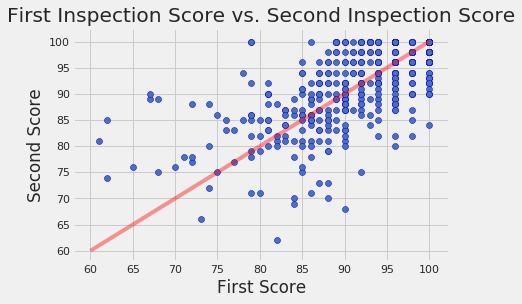

In [27]:
import matplotlib.pyplot as plt
# bw_bins = range(50, 102, 1)
# plt = filtered['score'].hist(bins=bw_bins, ec='w')
# plt.set_xlabel('Score')
# plt.set_ylabel('Count')
# plt.set_title('Distribution of Inspection Scores')

plt.figure()

x = np.linspace(60,100,5)
y = x
plt.plot(x, y, color = 'red', alpha=0.4)

score1 = [scores_pairs_by_business['score_pair'][i][0] 
          for i in scores_pairs_by_business.index
          if abs(scores_pairs_by_business['score_pair'][i][0] - 
            scores_pairs_by_business['score_pair'][i][1]) <= 30]

score2 = [scores_pairs_by_business['score_pair'][i][1] 
          for i in scores_pairs_by_business.index
        if abs(scores_pairs_by_business['score_pair'][i][0] - 
            scores_pairs_by_business['score_pair'][i][1]) <= 30]

plt.scatter(score1, score2, c='b', marker='o', 
            facecolors='none', edgecolors='blue')


plt.xlabel('First Score')
plt.ylabel('Second Score')
plt.title('First Inspection Score vs. Second Inspection Score')






<br/><br/><br/>


---


### Question 2d

Another way to compare the scores from the two inspections is to examine the difference in scores. Subtract the first score from the second in `scores_pairs_by_business`. Make a histogram of these differences in the scores. We might expect these differences to be positive, indicating an improvement from the first to the second inspection.

The histogram should look like this:

![](data/2d.png)

Hint: Use `second_score` and `first_score` created in the scatter plot code above.

Hint: Convert the scores into numpy arrays to make them easier to deal with.

Hint: Use `plt.hist()` Try changing the number of bins when you call `plt.hist()`.

<!--
BEGIN QUESTION
name: q2d
points: 2
manual: True
-->
<!-- EXPORT TO PDF -->

(-24.25, 47)

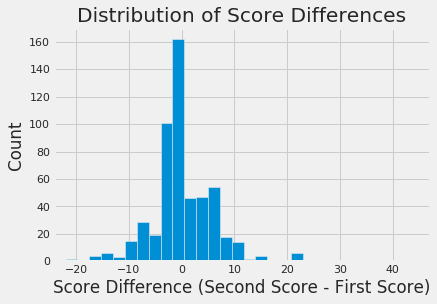

In [28]:
first_score = np.asarray(score1)
second_score = np.asarray(score2)

plt.hist(second_score-first_score, bins=20)
plt.xlabel('Score Difference (Second Score - First Score)')
plt.ylabel('Count')
plt.title('Distribution of Score Differences')
plt.xlim(right=47)
           

In [29]:
score_diff = [score2[i]-score1[i] for i in range(len(score1))]
num_improved = [s for s in score_diff if s > 0]
num_failed = [s for s in score_diff if s < 0]
num_stayed = [s for s in score_diff if s == 0]
print('score_improved: ', len(num_improved))
print('score_failed: ', len(num_failed))
print('score_stayed: ', len(num_stayed))

score_improved:  192
score_failed:  196
score_stayed:  146


In [30]:
len(score2)

534

In [31]:
192+196+146

534

### <br/><br/><br/>


---


### Question 2e

If restaurants' scores tend to improve from the first to the second inspection, what do you expect to see in the scatter plot that you made in question 2c? What do you oberve from the plot? Are your observations consistent with your expectations? 

Hint: What does the slope represent?

<!--
BEGIN QUESTION
name: q2e
points: 1
manual: True
-->
<!-- EXPORT TO PDF -->

+ Answer:


+ The slope is represented as the difference between first and second scores. If a point is in the upper part of the graph from the slope, it means that the restaurant improves its point. Else if a point is in the lower part of the graph from the slope, the retaurant detoriates its point.


+ If restaurants' scores tend to improve from the first to the second inspection, we can expect to see there exists more points in the upper half of the graph (improvement). In other words, the density of the points in the lower-half of the graph will be more scare than the points in the upper-half.


+ We can observe from the graph that the scores that improved or stayed as their first scores (sum of diff(s2-s1) >= 0) are more than the score that detoriated (sum of diff(s2-s1) < 0). We can check this using list comprehension as the cell below. However, if we only compare the points that differ in its first and second time of inspection, we can see that the total points of detoriation are more than the total points of improvement. 


+ This means that the food safety inspection in SF is very strict in its rules. Or restaurants made their mistakes and were reported by its clients. My observations are consistent with my expectations.



In [32]:
score_diff = [score2[i]-score1[i] for i in range(len(score1))]
num_improved = [s for s in score_diff if s > 0]
num_failed = [s for s in score_diff if s < 0]
num_stayed = [s for s in score_diff if s == 0]
print('score_improved: ', len(num_improved))     #print 192
print('score_failed: ', len(num_failed))         #print 196
print('score_stayed: ', len(num_stayed))         #print 146

score_improved:  192
score_failed:  196
score_stayed:  146


<br/><br/><br/>

---

### Question 2f

If a restaurant's score improves from the first to the second inspection, how would this be reflected in the histogram of the difference in the scores that you made in question 2d? What do you oberve from the plot? Are your observations consistent with your expectations? Explain your observations in the language of Statistics: for instance, the center, the spread, the deviation etc.

<!--
BEGIN QUESTION
name: q2f
points: 1
manual: True
-->
<!-- EXPORT TO PDF -->

+ Answer:


+ If a restaurant's score improves from the first to the second inspection, we can expect a reflection in the histogram above in the way that this retaurant's score will appear on the right hand side of the score difference 0.


+ We can observe from the plot that the total restaurants that does not change their scores have highest counts. Meaning this diff(s2-s1)=0 is the PEAK(mode) of the graph. This is also the center of the graph. Meaning the total number of restaurants that did not change their scores is the highest amongst all retaurants that changed their scores.


+ The spread of the graph: this graph has narrow distribution between its score, as we can see in the below graph. The range of scores is mostly in [-10,10]. 


+ As we calculated in the cells below, the standard deviation of this graph is ~5.9. This is a high standard deviation, which indicates that the score values are spread out over the range[-10,10].


+ My observations are consistent with my expectations, as explained in part 2e above.

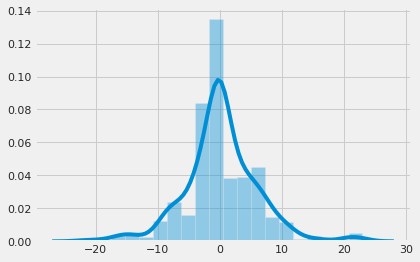

In [33]:
sns.distplot(second_score-first_score, bins = 20);

In [34]:
np.std(second_score-first_score)

5.9224832315596565

<br/><br/><br/>

---

### Question 2g 
To wrap up our analysis of the restaurant ratings over time, one final metric we will be looking at is the distribution of restaurant scores over time. Create a side-by-side boxplot that shows the distribution of these scores for each different risk category from 2017 to 2019. Use a figure size of at least 12 by 8.

The boxplot should look similar to the sample below:

![](data/2g.png)

**Hint**: Use `sns.boxplot()`. Try taking a look at the first several parameters.

**Hint**: Use `plt.figure()` to adjust the figure size of your plot.

<!--
BEGIN QUESTION
name: q2g
points: 3
manual: True
-->
<!-- EXPORT TO PDF -->

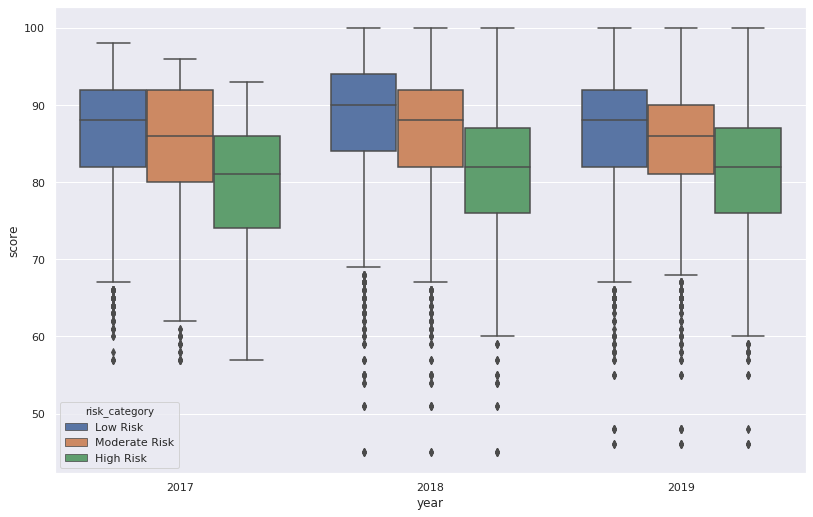

In [35]:
# Do not modify this line
sns.set()
plt.figure(figsize=(12,8))
m1 = pd.merge(ins.drop(columns=['date', 'bid', 'timestamp', 'type', 'Missing Score']), ins2vio, how='left')
m2 = pd.merge(m1, vio, how='left')
m2 = m2[m2['year'] > 2016]



ax = sns.boxplot(x='year', y='score', hue='risk_category', data=m2,
                hue_order=['Low Risk', 'Moderate Risk', 'High Risk'])

<br/><br/><br/><br/>

---

<br/><br/>


## Question 3 Interpreting Visualizations ##


<br/><br/><br/>

---

### Question 3a ###

Given a set of data points `(x[i], y[i], c[i])`, a hexbin plot is a visualization of what the aggregated quantity of `c[i]` values are for each coordinate `(x[i], y[i])`.

For example, given the following toy dataset:

| **x** | **y**  | **c** |
|-------|--------|-------|
| 1 | 0  | 3 |
| 1 | 0  | 4 |
| 1 | 0  | 5 |
| 2 | 1  | 1 |
| 2 | 1  | 2 |
| 3 | -1 | 3 |

Assume the aggregate function we are using here is `np.size`, for each coordinate (x, y), we will be counting how many c values there are for that coordinate. Specifically,

- For the coordinate (x = 1, y = 0), we will have an aggregated value of 3 for c because there are three entires corresponding to (x = 1, y = 0).
- For the coordinate (x = 2, y = 1), we will have an aggregated value of 2 for c.
- For the coordinate (x = 3, y = -1) we will have an aggregated value of 1 for c.

These aggregated c values will be used to determine the intensity of the color that we assign to each hexigonal bin. It is also important to see that when the bins have the same size, counting the number of occurrences of c is equivalent to determining the density of c for each coordinate.

In the context of restaurant ratings, we can choose our `x[i]`, `y[i]`, `c[i]` values to be the longitude, latitude, and inspection score for each restaurant in San Francisco respectively. Since `x[i]` and `y[i]` also encode the geolocation of each restaurant, we can produce a geospatial hexbin plot that maps the density of scores to different locations within the city.

In order to produce the geospatial plot, we need to make sure we have all the data we need to create the plot. First, create a DataFrame `rated_geo` that includes the `longitude`, `latitude`, and `score` for each restaurant.

Hint: Note that not all the current data we have are actually valid. Some scores might be negative, and some longitude and latitudes are also invalid coordinates on Earth. Make sure to filter out those values in your resulting DataFrame.

Hint: Note that we are only concerned with the restaurant in the San Francisco region, so make sure that when you are filtering out the `latitude` and `longitude` columns, the range you provide in the flitering statement **makes sense** with the latitude and longitude of an actual location from San Francisco. **Don't worry too much about the how strict the bound needs to be**; as long as you cover all of San Francisco, you should be able to reproduce the same results we have for this question.

<!--
BEGIN QUESTION
name: q3a
points: 3
-->

In [36]:
valid_inspection = pd.merge(
        bus.drop(columns=['city','state','postal_code', 
                          'phone_number','postal5', 'name']),
        ins.drop(columns=['iid', 'date','type', 'Missing Score']), how='left')
        
valid_inspection = valid_inspection[(valid_inspection['score'] >= 0) 
         & (valid_inspection['longitude'] > -9999) & (valid_inspection['latitude'] > -9999)]

rated_geo = valid_inspection.drop(columns=['bid','address','timestamp','year'])
rated_geo = rated_geo[rated_geo['longitude'] != 0]

rated_geo

,latitude,longitude,score
0,37.755282,-122.420493,74.0
1,37.755282,-122.420493,76.0
2,37.755282,-122.420493,72.0
30,37.752158,-122.420362,85.0
31,37.752158,-122.420362,90.0
...,...,...,...
14492,37.780934,-122.399772,80.0
14493,37.780934,-122.399772,88.0
14552,37.756997,-122.420534,77.0
14553,37.756997,-122.420534,80.0


In [37]:
ok.grade("q3a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
q3a > Suite 1 > Case 3

>>> (rated_geo.shape[0] > 20000) and (rated_geo.shape[0] < 25000) == True
False

# Error: expected
#     True
# but got
#     False

Run only this test case with "python3 ok -q q3a --suite 1 --case 3"
---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 1
[ooooook....] 66.7% passed



<br/><br/><br/>

---

### Question 3b

Now that we have our DataFrame ready, we can start creating our geospatial hexbin plot.

Using the `rated_geo` DataFrame from 3a, produce a geospatial hexbin plot that shows the inspection count for all restaurant locations in San Francisco. 

Your plot should look similar to the one below:

![](data/3a.png)

Hint: Use `pd.DataFrame.plot.hexbin()` or `plt.hexbin()` to create the hexbin plot.

Hint: For the 2 functions we mentioned above, try looking at the parameter `reduce_C_function`, which determines the aggregate function for the hexbin plot.

Hint: Use `fig.colorbar()` to create the color bar to the right of the hexbin plot.

Hint: Try using a `gridsize` of 200 when creating your hexbin plot; it makes the plot cleaner.

<!--
BEGIN QUESTION
name: q3b
points: 4
manual: True
-->
<!-- EXPORT TO PDF -->

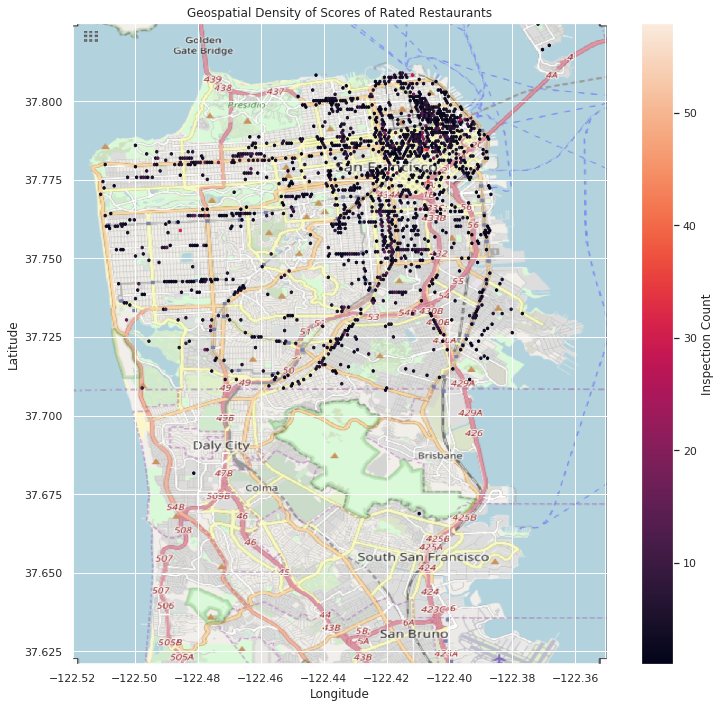

In [38]:
# DO NOT MODIFY THIS BLOCK
min_lon = rated_geo['longitude'].min()
max_lon = rated_geo['longitude'].max()
min_lat = rated_geo['latitude'].min()
max_lat = rated_geo['latitude'].max()
max_score = rated_geo['score'].max()
min_score = rated_geo['score'].min()
bound = ((min_lon, max_lon, min_lat, max_lat))
min_lon, max_lon, min_lat, max_lat
map_bound = ((-122.5200, -122.3500, 37.6209, 37.8249))
# DO NOT MODIFY THIS BLOCK

# Read in the base map and setting up subplot
# DO NOT MODIFY THESE LINES
basemap = plt.imread('./data/sf.png')
fig, ax = plt.subplots(figsize = (11,11))
ax.set_xlim(map_bound[0],map_bound[1])
ax.set_ylim(map_bound[2],map_bound[3])
# DO NOT MODIFY THESE LINES


# Create the hexbin plot
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Geospatial Density of Scores of Rated Restaurants')

clm = ax.hexbin(x= rated_geo['longitude'], y=rated_geo['latitude'], 
        C=rated_geo['score'], reduce_C_function=np.size, 
                gridsize=200)

fig.colorbar(clm, label='Inspection Count')
#The reason the Inspection Count was off by 90 was because I only joined 2 tables


# Setting aspect ratio and plotting the hexbins on top of the base map layer
# DO NOT MODIFY THIS LINE
ax.imshow(basemap, zorder=0, extent = map_bound, aspect= 'equal');
# DO NOT MODIFY THIS LINE

### <br/><br/><br/>

---

### Question 3c

Now that we've created our geospatial hexbin plot for the density of inspection scores for restaurants in San Francisco, let's also create another hexbin plot that visualizes the **average inspection scores** for restaurants in San Francisco.

Hint: If you set up everything correctly in 3b, you should only need to change 1 parameter here to produce the plot.

<!--
BEGIN QUESTION
name: q3c
points: 1
manual: True
-->
<!-- EXPORT TO PDF -->

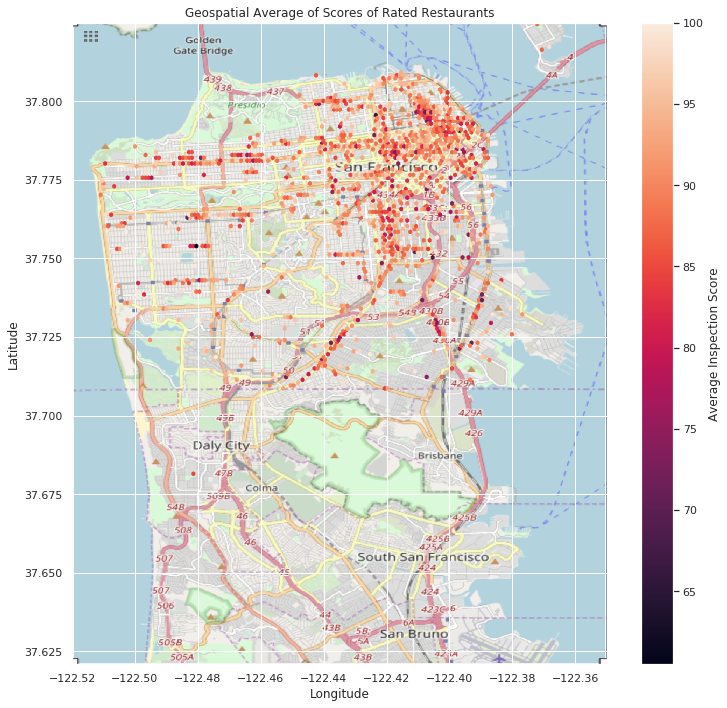

In [39]:
# Read in the base map and setting up subplot
# DO NOT MODIFY THESE LINES
basemap = plt.imread('./data/sf.png')
fig, ax = plt.subplots(figsize = (11,11))
ax.set_xlim(map_bound[0],map_bound[1])
ax.set_ylim(map_bound[2],map_bound[3])
# DO NOT MODIFY THESE LINES

# Create the hexbin plot
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Geospatial Average of Scores of Rated Restaurants')
clm = ax.hexbin(x= rated_geo['longitude'], y=rated_geo['latitude'], 
        C=rated_geo['score'], reduce_C_function=np.mean, 
                gridsize=150)
fig.colorbar(clm, label='Average Inspection Score')



# Setting aspect ratio and plotting the hexbins on top of the base map layer
# DO NOT MODIFY THIS LINE
ax.imshow(basemap, zorder=0, extent = map_bound, aspect= 'equal');
# DO NOT MODIFY THIS LINE

<br/><br/><br/>

---

### Question 3d

Given the 2 hexbin plots you have just created above, did you notice any connection between the first plot where we aggregate over the **inspection count** and the second plot where we aggregate over the **inspection mean**? In several sentences, comment your observations in the cell below. 

Here're some of the questions that might be interesting to address in your response:

- Roughly speaking, did you notice any of the actual locations (districts/places of interest) where inspection tends to be more frequent? What about the locations where the average inspection score tends to be low?
- Is there any connection between the locations where there are more inspections and the locations where the average inspection score is low?
- What have might led to the connections that you've identified?

<!--
BEGIN QUESTION
name: q3d
points: 2
manual: True
-->
<!-- EXPORT TO PDF -->

+ Answer: The connection between the first plot where we aggregate over the INSPECTION COUNT and the second plot where we aggregate over the INSPECTION MEAN:


+ Firstly, the first we can notice immediately is that most restaurants tend to be located in downtown SF. This is understandable because downtown of SF is the center of entertainment, business, and skyscrapers. Moreover, people usually visit SF near the piers where they can see all the fantastic view of the city. This is the reason why inspection tends to be more frequent in places near downtown SF, and more scarce outside the downtown.



+ Secondly, the locations where average inspection score tends to be low are near the piers (not necessarily near downtown SF). Where there are more inspections (North-East side of downtown SF, near the piers and China Town), the average inspection score tends to be lower than those places where there are fewer inspections. This might be because people tend to be in places near downtown (large population), which makes it harder to keep food safe and cleaned since restaurant employees have to work extremely harder.



+ However, we can see that in the North and North-West sides, the average score of restaurants tends to be very high (more than 90). This can be the result of fewer inspections and smaller population.



+ As analyzed above, the reasons for those connections might be because of many factors: population density, environment near the Piers, people's hygiene awareness, or the diverse culture of the downtown of SF.

## Summary of Inspections Data

We have done a lot in this project! Below are some examples of what we have learned about the inspections data through some cool visualizations!

- We found that the records are at the inspection level and that we have inspections for multiple years.
- We also found that many restaurants have more than one inspection a year.
- By joining the business and inspection data, we identified the name of the restaurant with the worst rating and optionally the names of the restaurants with the best rating.
- We identified the restaurant that had the largest swing in rating over time.
- We also examined the change of scores over time! Many restaurants are not actually doing better.
- We created cool hexbin plots to relate the ratings with the location of restaurants! Now we know where to go if we want good food!

<br/><br/><br/><br/>

---

<br/><br/>

## Question 4 Create some more cool visualizations!

<br/>

It is your turn now! Play with the data, and try to produce some visualizations to answer one question that you find interesting regarding the data. You might want to use `merge`/`groupby`/`pivot` to process the data before creating visualizations.

Please show your work in the cells below (feel free to use extra cells if you want), and describe in words what you found in the same cell. This question will be graded leniently, but good solutions may be used to create future homework problems. 



### Grading ###

Since the assignment is more open ended, we will have a more relaxed rubric, classifying your answers into the following three categories:

- **Great** (4-5 points): The chart is well designed, and the data computation is correct. The text written articulates a reasonable metric and correctly describes the relevant insight and answer to the question you are interested in.
- **Passing** (3-4 points): A chart is produced but with some flaws such as bad encoding. The text written is incomplete but makes some sense.
- **Unsatisfactory** (<= 2 points): No chart is created, or a chart with completely wrong results.

We will lean towards being generous with the grading. We might also either discuss in discussion or post on Piazza some examplar analysis you have done (with your permission)!

You should have the following in your answers:
* a few visualizations; Please limit your visualizations to 5 plots.
* a few sentences (not too long please!)

Please note that you will only receive support in OH and Piazza for Matplotlib and seaborn questions. However, you may use some other Python libraries to help you create you visualizations. If you do so, make sure it is compatible with the PDF export (e.g., Plotly does not create PDFs properly, which we need for Gradescope).

<!--
BEGIN QUESTION
name: q4
points: 5
manual: True
-->
<!-- EXPORT TO PDF -->

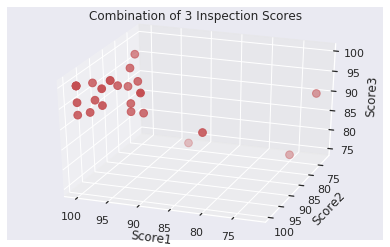

In [40]:
# YOUR DATA PROCESSING AND PLOTTING HERE
from mpl_toolkits.mplot3d import Axes3D

scores_triples_by_business = ins.sort_values(by=['date']).groupby(['bid'
        ,'year']).filter(lambda x: x['bid'].size == 3).groupby(['bid']).agg(lambda x: 
           x.tolist()).drop(columns=['iid','date','type','timestamp','year',
        'Missing Score']).rename(columns={'score':'score_triple'})

score1 = [scores_triples_by_business['score_triple'][i][0] 
          for i in scores_triples_by_business.index
          if np.average(scores_triples_by_business['score_triple'][i][0] 
            + scores_triples_by_business['score_triple'][i][1]
            + scores_triples_by_business['score_triple'][i][2]) >= 70]

score2 = [scores_triples_by_business['score_triple'][i][1] 
          for i in scores_triples_by_business.index
        if abs(scores_triples_by_business['score_triple'][i][0]  
            + scores_triples_by_business['score_triple'][i][1]
            + scores_triples_by_business['score_triple'][i][2]) >= 70]

score3 = [scores_triples_by_business['score_triple'][i][2] 
          for i in scores_triples_by_business.index
          if abs(scores_triples_by_business['score_triple'][i][0]
            + scores_triples_by_business['score_triple'][i][1]
            + scores_triples_by_business['score_triple'][i][2]) >= 70]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
clm = ax.scatter(score1, score2, score3, c='r', s=60, marker='o', 
             facecolors='none', edgecolors='r')

ax.set_xlabel('Score1')
ax.set_ylabel('Score2')
ax.set_zlabel('Score3')
ax.set_title('Combination of 3 Inspection Scores')
ax.view_init(30, 110)
plt.show()


# YOUR EXPLANATION HERE (in a comment):

# We now take a look at restaurants that have 3 inspection scores from 2016-2019.
# As we can see from the 3D graph below, most inspection scores are consistent.
# There are only 3 restaurants that have inconsisent scores of (72,72,90); (92,75,75); 
# (98, 82, 100). We can also take a look at the data frame below to see the triples
# of restaurants score.

In [41]:
scores_triples_by_business

,score_triple
bid,
3838,"[72, 72, 90]"
4686,"[94, 94, 92]"
5528,"[100, 100, 100]"
5544,"[100, 100, 100]"
5823,"[96, 89, 100]"
5854,"[98, 92, 98]"
5855,"[90, 100, 100]"
5959,"[98, 100, 94]"
7649,"[98, 92, 98]"


In [42]:
#Another interesting fact: WHERE ARE RESTAURANTS USUALLY INSPECTED THRICE?
#Data Manipulation
bid = scores_triples_by_business.index
scores_triples_by_business.index = [i for i in range(len(scores_triples_by_business.index))]
scores_triples_by_business['bid'] = bid
scores_triples_by_business

,score_triple,bid
0,"[72, 72, 90]",3838
1,"[94, 94, 92]",4686
2,"[100, 100, 100]",5528
3,"[100, 100, 100]",5544
4,"[96, 89, 100]",5823
5,"[98, 92, 98]",5854
6,"[90, 100, 100]",5855
7,"[98, 100, 94]",5959
8,"[98, 92, 98]",7649
9,"[94, 94, 94]",7663


In [43]:
triple_locs = pd.merge(scores_triples_by_business, bus.drop(
    columns=['city','state','postal_code', 'latitude','longitude', 'phone_number']), how='left')
triple_locs

,score_triple,bid,name,address,postal5
0,"[72, 72, 90]",3838,CAFE PICARO,3120 16th St,94103
1,"[94, 94, 92]",4686,RICE GARDEN,1515 SLOAT Blvd,94132
2,"[100, 100, 100]",5528,AT&T - Juma Cart 1 - Ice Cream,24 WILLIE MAYS PLAZA,94107
3,"[100, 100, 100]",5544,AT&T - Juma Cart 1 - Coffee,24 WILLIE MAYS PLAZA,94107
4,"[96, 89, 100]",5823,WEBSTER ELEMENTARY SCHOOL,465 MISSOURI St,94107
5,"[98, 92, 98]",5854,Gateway High/Kip Schools,1430 Scott St,94115
6,"[90, 100, 100]",5855,SOTA (SCHOOL OF THE ARTS),555 Portola Dr,94131
7,"[98, 100, 94]",5959,ST. JOHN'S SNACK BAR,925 CHENERY St,94131
8,"[98, 92, 98]",7649,SERV U MARKET,2750 21st St,94110
9,"[94, 94, 94]",7663,GGP MARKET,2948 24th St,94110


In [44]:
triple_locs.groupby('postal5').agg(np.size)

,score_triple,bid,name,address
postal5,,,,
94103,1,1,1,1
94105,4,4,4,4
94107,6,6,6,6
94109,2,2,2,2
94110,5,5,5,5
94115,1,1,1,1
94131,2,2,2,2
94132,2,2,2,2
94133,1,1,1,1


In [45]:
# YOUR EXPLANATION HERE (in a comment):
# Based on this link that shows the zipcode of SF: 
# http://www.healthysf.org/bdi/outcomes/zipmap.htm
# We can see that most restaurants that have been
# inspected thrice located near the piers of SF.

In [46]:
# THIS CELL AND ANY CELLS ADDED BELOW WILL NOT BE GRADED

## Congratulations! You have finished Part B of Project 1! ##

# Submit
Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output.
**Please save before submitting!**

<!-- EXPECT 12 EXPORTED QUESTIONS -->

In [47]:
# Save your notebook first, then run this cell to submit.
import jassign.to_pdf
jassign.to_pdf.generate_pdf('proj1b.ipynb', 'proj1b.pdf')
ok.submit()

Generating PDF...
Saved proj1b.pdf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... 

ERROR  | auth.py:91 | {'error': 'invalid_grant'}


Saved 'proj1b.ipynb'.
Performing authentication
Please enter your bCourses email.
bCourses email: letantruong32@berkeley.edu

Copy the following URL and open it in a web browser. To copy,
highlight the URL, right-click, and select "Copy".

https://okpy.org/client/login/

After logging in, copy the code from the web page, paste it below,
and press Enter. To paste, right-click and select "Paste".

Paste your code here: hnW6PKTBnc4ynGwLeAgI3s03Gp3piA
Successfully logged in as letantruong32@berkeley.edu
Submit... 100% complete
Submission successful for user: letantruong32@berkeley.edu
URL: https://okpy.org/cal/data100/sp20/proj1b/submissions/w0JgDr

